## CLUSTERING AND PCA ASSIGNMENT:

    HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

    And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

In [66]:
#importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#scaling
import sklearn
from sklearn.preprocessing import StandardScaler

#pca
from sklearn.decomposition import PCA

#incremental pca
from sklearn.decomposition import IncrementalPCA

#kmeans clustering
from sklearn.cluster import KMeans

#silhouette score
from sklearn.metrics import silhouette_score


#hierarchial clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## DATA UNDERSTANDING

In [67]:
#Loading and reading the data:
country=pd.read_csv(r"E:\data science\ML_Assignment2\Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [68]:
#basic sanity check:
country.shape

(167, 10)

In [69]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [70]:
#summary of the data:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [71]:
#Checking the missing values if any:
100*(round(country.isnull().sum()/len(country.index),2))

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### NOTE:There are no missing values present in the data. Hence we can proceed further.


In [72]:
#Check duplicate values:
country.duplicated().value_counts()


False    167
dtype: int64

#### NOTE: Hence, there is no duplicate data present.

In [73]:
#column names:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [74]:
#Check for Spelling mistakes:
country['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

## DATA PREPARATION:

#### DATA VISUALISATION :

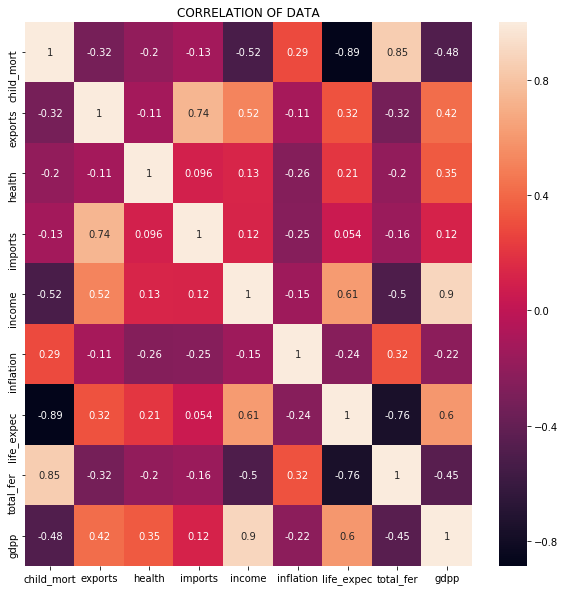

In [75]:
#creating heatmaps:
plt.figure(figsize=(10,10))
ax=sns.heatmap(country.corr(),annot=True) #correlation matrix with heatmaps
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('CORRELATION OF DATA')
plt.savefig("Correlation.png")

### Highest Correlated Variables: 
    -Child_mort and total_fer
    -exports and imports
    -gdpp and life_expec

##### OUTLIERS DETECTION:

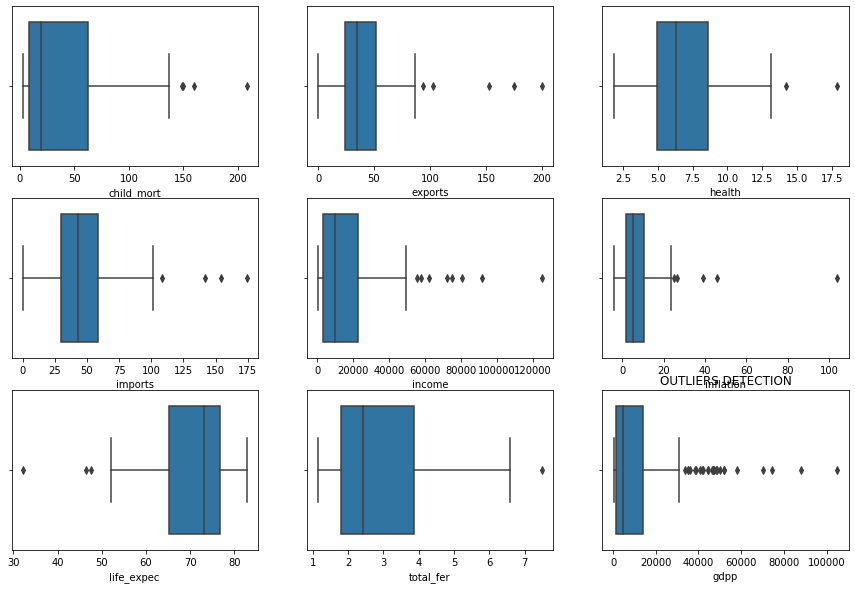

In [76]:
#Checking Outliers:
plt.figure(figsize=(15,10))

plt.subplot(3,3,1) # SUBPLOT
sns.boxplot(country['child_mort']) # BOX PLOT FOR OUTLIER DETECTION.

plt.subplot(3,3,2)
sns.boxplot(country['exports'])

plt.subplot(3,3,3)
sns.boxplot(country['health'])

plt.subplot(3,3,4)
sns.boxplot(country['imports'])

plt.subplot(3,3,5)
sns.boxplot(country['income'])

plt.subplot(3,3,6)
sns.boxplot(country['inflation'])

plt.subplot(3,3,7)
sns.boxplot(country['life_expec'])

plt.subplot(3,3,8)
sns.boxplot(country['total_fer'])

plt.subplot(3,3,9)
sns.boxplot(country['gdpp'])

plt.title("OUTLIERS DETECTION")
plt.savefig("Outliers.png")
plt.show()


### NOTE: We can see that, there are some outliers present in gdpp, income and inflation columns. But lets not remove these outliers , as it might led to loss of data for some countries. We can do Capping to handle the outliers.

In [77]:
#creating a copy of the original data for further use:
country_copy=country.copy()
country_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### HANDLING THE OUTLIERS USING CAPPING:
###### We will not remove the outleirs completely , as it may led to data loss, which is not correct through a businees perspective.
###### Here there are not much outliers, hence we are using Soft Capping. ( Q1=0.01 and Q2=0.99)

In [78]:
#Capping:
Q1 = country_copy.child_mort.quantile(0.01)
Q4 = country_copy.child_mort.quantile(0.99)
country_copy['child_mort'][country_copy['child_mort'] <= Q1]=Q1
country_copy['child_mort'][country_copy['child_mort'] >= Q4]=Q4


Q1 = country_copy.exports.quantile(0.01)
Q4 = country_copy.exports.quantile(0.99)
country_copy['exports'][country_copy['exports'] <= Q1]=Q1
country_copy['exports'][country_copy['exports'] >= Q4]=Q4


Q1 = country_copy.health.quantile(0.01)
Q4 = country_copy.health.quantile(0.99)
country_copy['health'][country_copy['health'] <= Q1]=Q1
country_copy['health'][country_copy['health'] >= Q4]=Q4


Q1 = country_copy.imports.quantile(0.01)
Q4 = country_copy.imports.quantile(0.99)
country_copy['imports'][country_copy['imports'] <= Q1]=Q1
country_copy['imports'][country_copy['imports'] >= Q4]=Q4


Q1 = country_copy.income.quantile(0.05)
Q4 = country_copy.income.quantile(0.95)
country_copy['income'][country_copy['income'] <= Q1]=Q1
country_copy['income'][country_copy['income'] >= Q4]=Q4


Q1 = country_copy.inflation.quantile(0.05)
Q4 = country_copy.inflation.quantile(0.95)
country_copy['inflation'][country_copy['inflation'] <= Q1]=Q1
country_copy['inflation'][country_copy['inflation'] >= Q4]=Q4

Q1 = country_copy.life_expec.quantile(0.01)
Q4 = country_copy.life_expec.quantile(0.99)
country_copy['life_expec'][country_copy['life_expec'] <= Q1]=Q1
country_copy['life_expec'][country_copy['life_expec'] >= Q4]=Q4

Q1 = country_copy.total_fer.quantile(0.01)
Q4 = country_copy.total_fer.quantile(0.99)
country_copy['total_fer'][country_copy['total_fer'] <= Q1]=Q1
country_copy['total_fer'][country_copy['total_fer'] >= Q4]=Q4

Q1 = country_copy.gdpp.quantile(0.05)
Q4 = country_copy.gdpp.quantile(0.95)
country_copy['gdpp'][country_copy['gdpp'] <= Q1]=Q1
country_copy['gdpp'][country_copy['gdpp'] >= Q4]=Q4

In [79]:
#checking the summaryof the data after capping:
country_copy.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,40.818376,6.787614,46.760096,15755.491018,7.016075,70.645269,2.942896,12003.719162
std,39.026793,25.697471,2.642518,23.052216,14770.353771,6.271398,8.553975,1.497595,15154.443890
min,2.800000,3.909400,2.121800,12.988000,1213.000000,0.183400,47.160000,1.243200,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,160.480000,13.474000,146.080000,48290.000000,20.870000,82.370000,6.563600,48610.000000


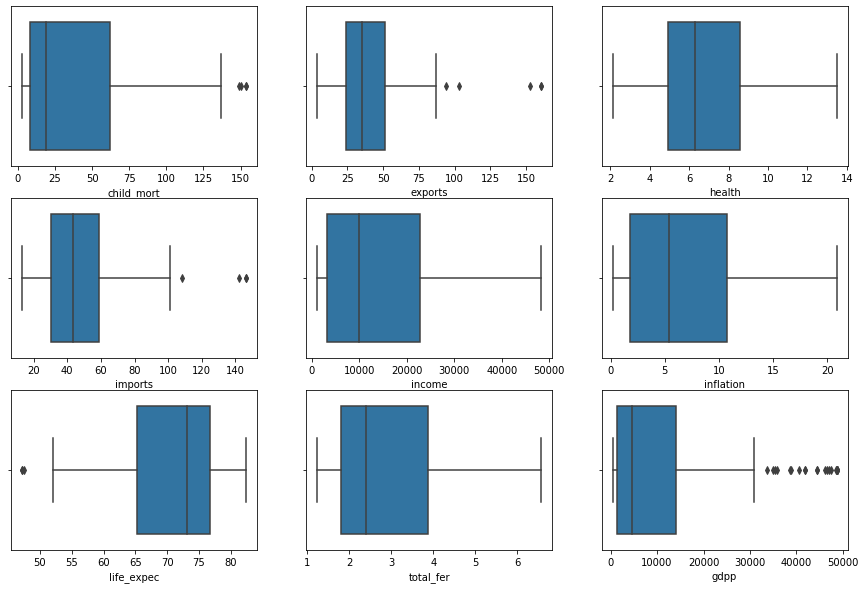

In [80]:
#plotting the boxplots again to check the outliers again.
plt.figure(figsize=(15,10))

plt.subplot(3,3,1) # SUBPLOT
sns.boxplot(country_copy['child_mort']) # BOX PLOT FOR OUTLIER DETECTION.

plt.subplot(3,3,2)
sns.boxplot(country_copy['exports'])

plt.subplot(3,3,3)
sns.boxplot(country_copy['health'])

plt.subplot(3,3,4)
sns.boxplot(country_copy['imports'])

plt.subplot(3,3,5)
sns.boxplot(country_copy['income'])

plt.subplot(3,3,6)
sns.boxplot(country_copy['inflation'])

plt.subplot(3,3,7)
sns.boxplot(country_copy['life_expec'])

plt.subplot(3,3,8)
sns.boxplot(country_copy['total_fer'])

plt.subplot(3,3,9)
sns.boxplot(country_copy['gdpp'])


plt.savefig("capping.png")
plt.show()

#### Now we can see that there are negligible amount of outliers in the whole data which is acceptable.

## SCALING DATA:


In [81]:
#scaling the numeric data using Standardisation:
num_var = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
scaler = StandardScaler() 
country_copy[num_var] = scaler.fit_transform(country_copy[num_var])

In [82]:
#Data after scaling:
country_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.344012,-1.202883,0.300762,-0.080933,-0.960575,0.387667,-1.693799,1.926928,-0.757874
1,Albania,-0.547543,-0.500319,-0.090190,0.080055,-0.395590,-0.404004,0.663053,-0.865911,-0.523775
2,Algeria,-0.272548,-0.094393,-0.993555,-0.668322,-0.193907,1.452825,0.686504,-0.035427,-0.499286
3,Angola,2.084186,0.838457,-1.494581,-0.167954,-0.669255,2.215708,-1.236499,2.154642,-0.560839
4,Antigua and Barbuda,-0.709457,0.182730,-0.287564,0.528210,0.227115,-0.891802,0.721681,-0.544433,0.012991


## PRINCIPAL COMPONENT ANALYSIS:

In [83]:
#Instantiating a pca object using Randomized technique of SVD_Solver:
pca = PCA(svd_solver='randomized',random_state=42)

In [84]:
#divding the data into X and y:
X=country_copy.drop(['country'],axis=1)
y=country_copy['country']

In [85]:
#Applying pca to the X data:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [86]:
#Components of PCA:
pca.components_

array([[-0.41390336,  0.25136524,  0.17160217,  0.13433724,  0.41191648,
        -0.22497796,  0.4247647 , -0.40114569,  0.39543969],
       [ 0.10580284,  0.62355252, -0.21055059,  0.70822806, -0.07235159,
        -0.03115769, -0.16169902,  0.07640535, -0.1260142 ],
       [-0.15461668,  0.19144492, -0.67563537, -0.25700524,  0.154915  ,
         0.59507777,  0.16604968, -0.10534034, -0.01106266],
       [ 0.37156727,  0.18024061,  0.2349707 , -0.08016096,  0.44976464,
         0.28859158, -0.17956788,  0.42483573,  0.51914422],
       [-0.21135613,  0.01108754,  0.58857881,  0.20402981, -0.15210235,
         0.69182381,  0.06371427, -0.13577287, -0.20713131],
       [ 0.16386325,  0.02324405,  0.01575373, -0.09211086,  0.16050369,
         0.03404769, -0.66652169, -0.70088164,  0.03832811],
       [-0.06064992, -0.67862027, -0.25657764,  0.58865505,  0.12364606,
         0.1523126 , -0.05775231, -0.01357281,  0.28538088],
       [ 0.7576778 , -0.04218901,  0.0056271 ,  0.0777789 , -0

#### There are 9 Principal Components. Hence creating a dataframe for those PCs.

In [87]:
#creating a dataframe for those 9 PCA components:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8],'Feature':colnames})
pcs_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.413903,0.105803,-0.154617,0.371567,-0.211356,0.163863,-0.060650,0.757678,0.079023,child_mort
1,0.251365,0.623553,0.191445,0.180241,0.011088,0.023244,-0.678620,-0.042189,-0.126061,exports
2,0.171602,-0.210551,-0.675635,0.234971,0.588579,0.015754,-0.256578,0.005627,0.044607,health
3,0.134337,0.708228,-0.257005,-0.080161,0.204030,-0.092111,0.588655,0.077779,0.072195,imports
4,0.411916,-0.072352,0.154915,0.449765,-0.152102,0.160504,0.123646,-0.096662,0.724758,income


In [88]:
#Variance explained:
pca.explained_variance_ratio_

array([0.48676399, 0.17082357, 0.13325699, 0.09958755, 0.06363794,
       0.02024564, 0.01242123, 0.00943683, 0.00382627])

### We can see that first 2 to 3 components are explaining most of the variance. Hence Plotting a Cumulative variance using Scree plot.

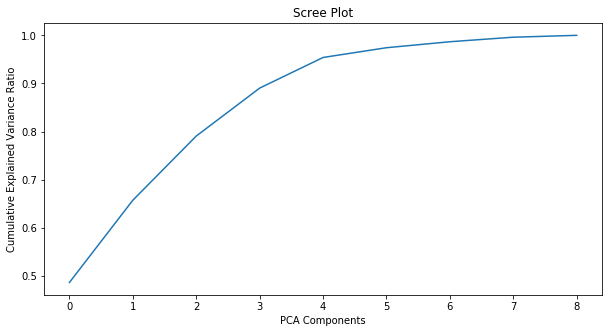

In [89]:
#SCREE PLOT
plt.figure(figsize=(10,5))
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title ('Scree Plot')
plt.xlabel('PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.savefig("scree_plot.png")


#### NOTE: From tht above Scree plot we can say that, almost 95% of the variance is explained by the first 4 components.
    

#### Moving forward with First 4 components using Incremental PCA.

#### INCREMENTAL PCA:


In [90]:
#Incremental PCA with 4 components: (Perform PCA and choose only 4 components)

final_pca = IncrementalPCA(n_components=4)

In [91]:
#Fitting the PCA components.(Transform the data from original basis to PC basis.)
final_df = final_pca.fit_transform(X)
final_df.shape

(167, 4)

In [92]:
#Creating a dataframe of all the 4 PCA components:
pca_df = pd.DataFrame(final_df,columns=["PC1","PC2","PC3","PC4"])
pca_df.head()


,PC1,PC2,PC3,PC4
0,-3.092956,-0.219504,-1.006009,0.757343
1,0.446122,-0.378098,-0.013988,-1.369645
2,-0.468661,-0.341704,1.886559,-0.320336
3,-3.316476,1.467897,1.563956,1.787168
4,1.184911,0.329383,-0.150186,-0.865215


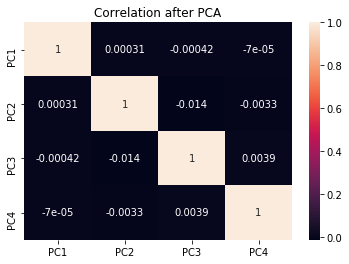

In [93]:
#creating Correlation matrix for PCA dataframe
ax=sns.heatmap(pca_df.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation after PCA')
plt.savefig('Correlation_after_PCA.png')

### NOTE: Now after PCA we can see that the Correlations of all the varaibles are close to 0. Hence we can move forward with this PCA data set.

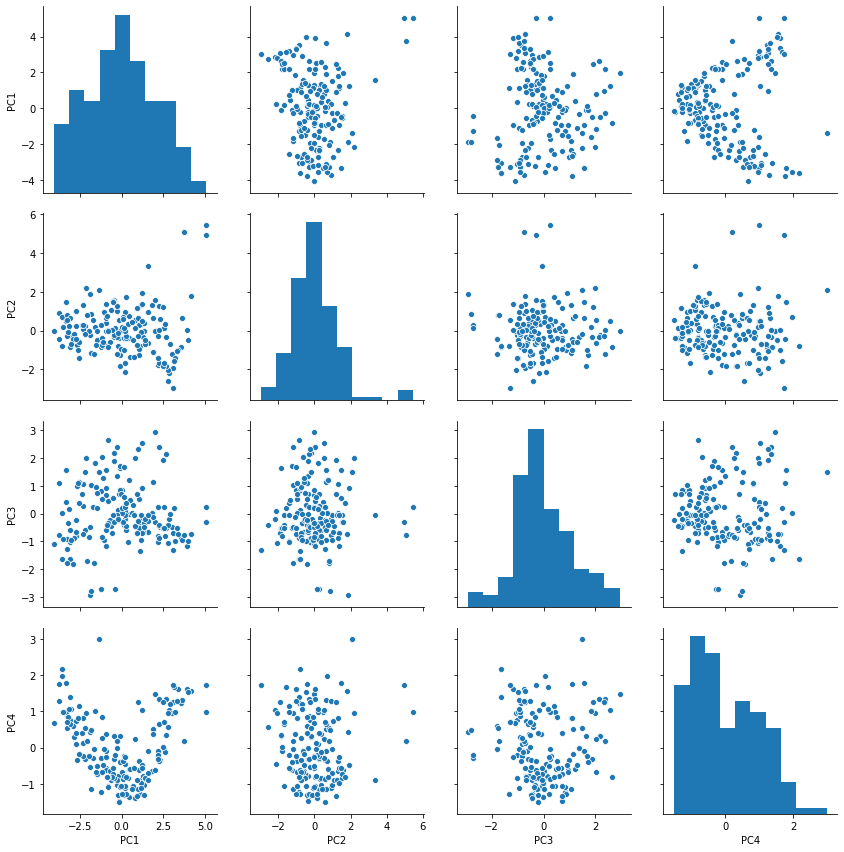

In [94]:
#Visualising the PCA components using a Pairplot:

sns.pairplot(data=pca_df,size=3)

plt.savefig('pairplot.png')

### HOPKINS STATISTICS:
The Hopkins statistic is a way of measuring the cluster tendency of a data set.

In [95]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [96]:
#checking the hopkins score:
hopkins(pca_df)

0.7824402071129412

####  Hopkins score close to 1 is good. Hence the data is suitable for clustering.

## CLUSTERING:


### K-MEANS CLUSTERING:

In [97]:
#creating a copy of the PCA data set
df_kmeans=pca_df

#### FINDING OPTIMAL NUMBER OF CLUSTERS:
    - SUM OF SQUARED DISTANCES (ELBOW CURVE)
    - SILHOUETTE ANALYSIS

##### SUM OF SQUARED DISTANCES (ELBOW CUVRE)

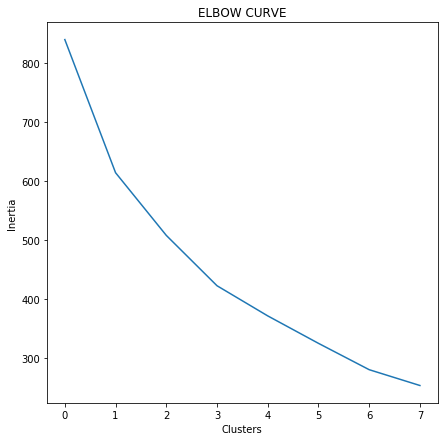

In [98]:

plt.figure(figsize=(7,7))
ssd=[]
for num_cluster in range(2,10):        # range of clusters from 2 to 10
    kmeans=KMeans(n_clusters=num_cluster,max_iter=50,random_state=3425)      # instantiating a kmeans object
    kmeans.fit(df_kmeans)            #fitting the PCA data on KMeans
    ssd.append(kmeans.inertia_)      #adding the inertia values to the sse list
plt.plot(ssd)    #plotting the elbow curve
plt.title('ELBOW CURVE')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.savefig('elbow_curve.png')

##### SILHOUETTE ANALYSIS:

For n_cluster=2, the silhouette score is 0.3198574646040525
For n_cluster=3, the silhouette score is 0.3293430948766597
For n_cluster=4, the silhouette score is 0.34636769464243083
For n_cluster=5, the silhouette score is 0.3100254628137794
For n_cluster=6, the silhouette score is 0.3244784443684249
For n_cluster=7, the silhouette score is 0.3082233470856944
For n_cluster=8, the silhouette score is 0.30423636396049936
For n_cluster=9, the silhouette score is 0.3108018532169152


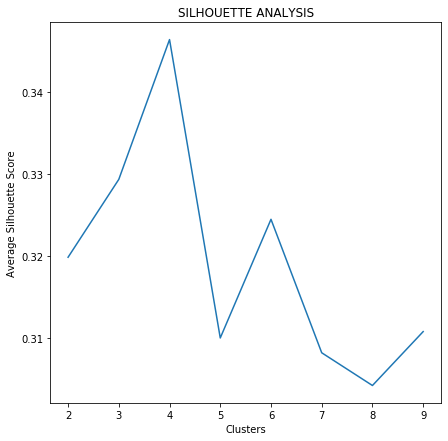

In [99]:
plt.figure(figsize=(7,7))
se=[]
for num_cluster in range(2,10): # range of clusters from 2 to 10
    kmeans=KMeans(n_clusters=num_cluster,max_iter=50,random_state=3425) # instantiating a kmeand object
    kmeans.fit(df_kmeans)      #fitting the PCA data on KMeans
    cluster_labels=kmeans.labels_   #cluster labels
    sil_avg=silhouette_score(df_kmeans,cluster_labels) #average silhouette score
    print("For n_cluster={0}, the silhouette score is {1}".format(num_cluster,sil_avg))
    se.append([num_cluster,sil_avg])    #adding the average score to the list 
plt.plot(pd.DataFrame(se)[0], pd.DataFrame(se)[1]) #plotting the values
plt.title('SILHOUETTE ANALYSIS')
plt.xlabel('Clusters')
plt.ylabel('Average Silhouette Score')


plt.savefig('Silhouette.png')

### NOTE: From the Sum of Squared distances plot , we can see that the elbow ranges from 2 to 4. Also the Silhouette Analysis show that the highest peak is at cluster 4. Hence we can go forward with 4 clusters.

In [100]:
#Taking clusters=4:
kmeans=KMeans(n_clusters=4,max_iter=50,random_state=3425)
kmeans.fit(df_kmeans)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3425, tol=0.0001, verbose=0)

In [101]:
#Merging the df_kmeans and Country column:
country_kmeans = pd.concat([y,df_kmeans,pd.Series(kmeans.labels_)], axis=1)
country_kmeans.columns = ['country','PC1', 'PC2','PC3','PC4','ClusterID']
country_kmeans.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.092956,-0.219504,-1.006009,0.757343,1
1,Albania,0.446122,-0.378098,-0.013988,-1.369645,0
2,Algeria,-0.468661,-0.341704,1.886559,-0.320336,0
3,Angola,-3.316476,1.467897,1.563956,1.787168,1
4,Antigua and Barbuda,1.184911,0.329383,-0.150186,-0.865215,0


In [102]:
#count of observations in each cluster:
country_kmeans['ClusterID'].value_counts() 

0    81
1    49
3    34
2     3
Name: ClusterID, dtype: int64

#### Visualisation of Clustered Components:

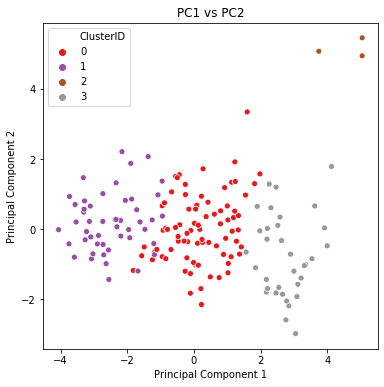

In [103]:
#Plotting the Components with Cluster:
plt.figure(figsize=(6,6))
sns.scatterplot(x="PC1",y="PC2",hue="ClusterID",palette="Set1",data=country_kmeans)
plt.title('PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('PC12_kmeans')
plt.show()

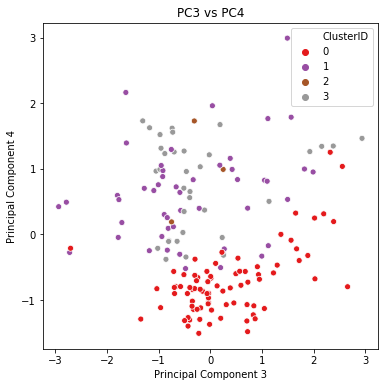

In [104]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="PC3",y="PC4",hue="ClusterID",palette="Set1",data=country_kmeans)
plt.title('PC3 vs PC4')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.savefig('PC34_kmeans')
plt.show()

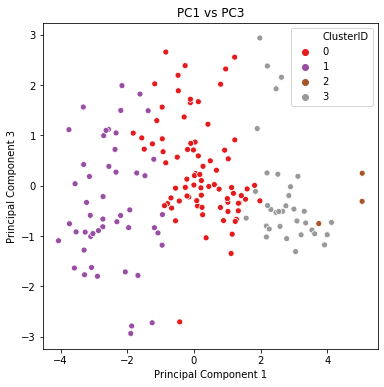

In [105]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="PC1",y="PC3",hue="ClusterID",palette="Set1",data=country_kmeans)
plt.title('PC1 vs PC3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.savefig('PC13_kmeans')
plt.show()

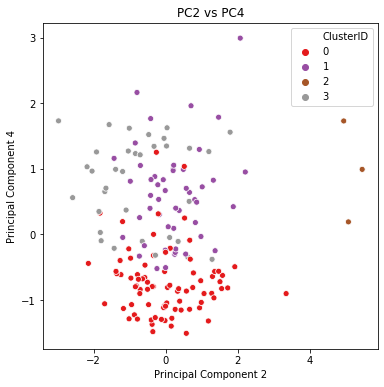

In [106]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="PC2",y="PC4",hue="ClusterID",palette="Set1",data=country_kmeans)
plt.title('PC2 vs PC4')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
plt.savefig('PC24_kmeans')
plt.show()

###### We can see that some cluster are distinct, where as some clusters are overlapping/

#### CLUSTER ANALYSIS:

In [107]:
#Merge the original df with kmeans df:
cluster_df=pd.merge(country,country_kmeans['ClusterID'],left_index=True,right_index=True)
cluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


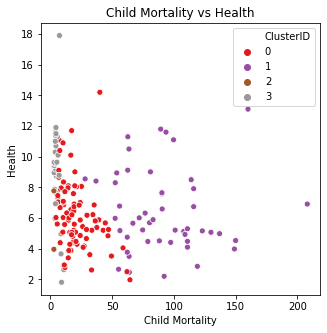

In [108]:
#Plotting actual variables with Cluster id:
plt.figure(figsize=(5,5))
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',palette='Set1',data=cluster_df)
plt.title('Child Mortality vs Health')
plt.xlabel('Child Mortality')
plt.ylabel('Health')
plt.savefig('Child_health')
plt.show()

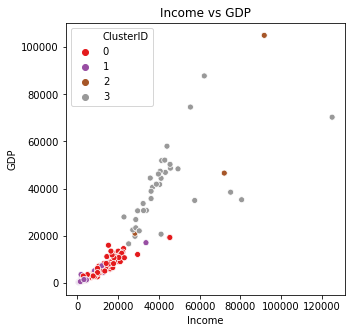

In [109]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',palette='Set1',data=cluster_df)
plt.title('Income vs GDP')
plt.xlabel('Income')
plt.ylabel('GDP')
plt.savefig('Income_gdp')
plt.show()

#### CLUSTER PROFILING:

In [110]:
#Grouping the average data based on cluster ids:
child_mort_mean=pd.DataFrame(cluster_df.groupby(['ClusterID']).child_mort.mean())
exports_mean=pd.DataFrame(cluster_df.groupby(['ClusterID']).exports.mean())
health_mean=pd.DataFrame(cluster_df.groupby(['ClusterID']).health.mean())
imports_mean=pd.DataFrame(cluster_df.groupby(['ClusterID']).imports.mean())
income_mean=pd.DataFrame(cluster_df.groupby(['ClusterID']).income.mean())
inflation_mean=pd.DataFrame(cluster_df.groupby(['ClusterID']).inflation.mean())
life_expec_mean=pd.DataFrame(cluster_df.groupby(['ClusterID']).life_expec.mean())
total_fer_mean=pd.DataFrame(cluster_df.groupby(['ClusterID']).total_fer.mean())
gdpp_mean=pd.DataFrame(cluster_df.groupby(['ClusterID']).gdpp.mean())


In [111]:
#Concating all the average values dataframe:
average_df=pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean, imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean],axis=1)

In [112]:
#Assigning the column names:
average_df.columns=['clusters','child_mort_mean','export_mean','health_mean','import_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
average_df.head()

,clusters,child_mort_mean,export_mean,health_mean,import_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,21.575309,40.509741,6.153827,46.966246,12430.617284,7.648877,72.979012,2.274321,6355.975309
1,1,90.810204,29.271633,6.424286,43.448980,3860.877551,11.923163,59.451020,4.961837,1885.306122
2,2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,3,5.335294,47.694118,8.958529,41.982353,43382.352941,2.599059,79.826471,1.788824,40738.235294


####  Plotting the Average data across the clusters

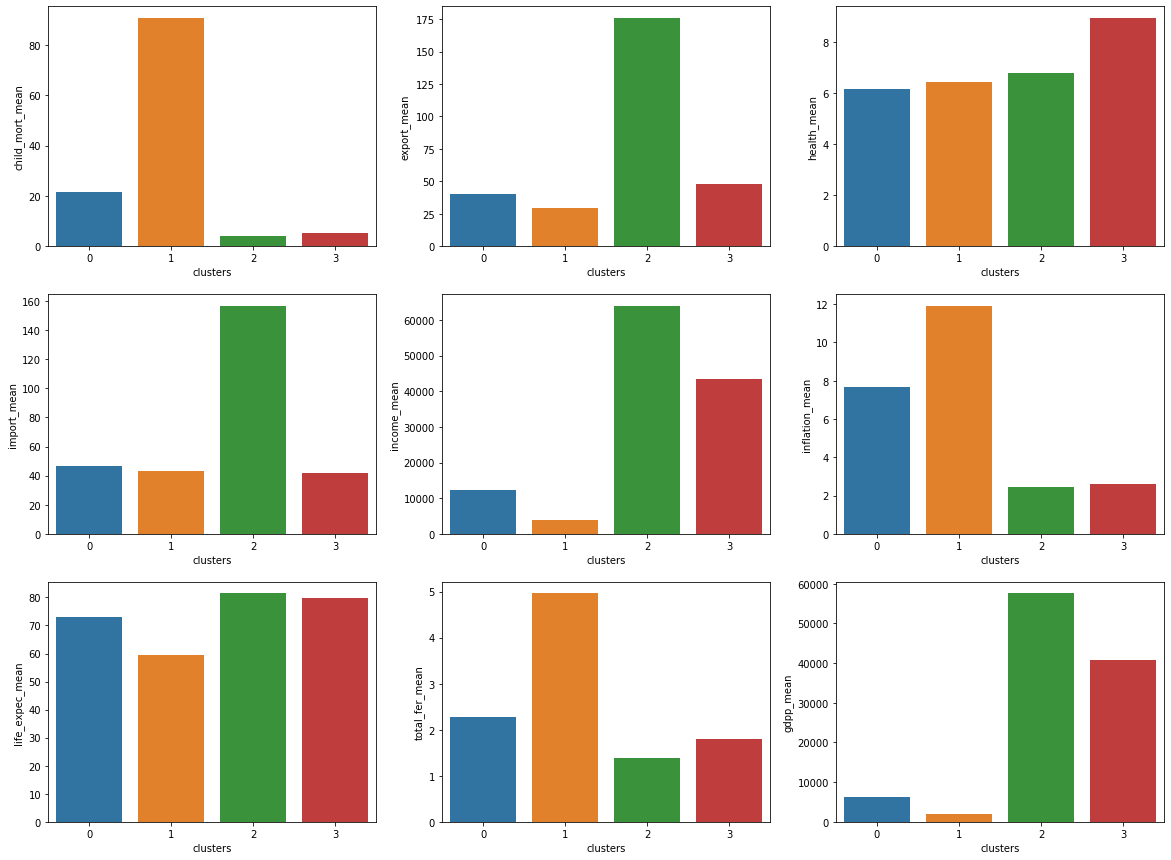

In [113]:
plt.figure(figsize = (20,15))
plt.title('Average Data across Clusters')
plt.subplot(3,3,1)
sns.barplot(average_df.clusters,average_df.child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(average_df.clusters,average_df.export_mean)

plt.subplot(3,3,3)
sns.barplot(average_df.clusters,average_df.health_mean)

plt.subplot(3,3,4)
sns.barplot(average_df.clusters,average_df.import_mean)

plt.subplot(3,3,5)
sns.barplot(average_df.clusters,average_df.income_mean)

plt.subplot(3,3,6)
sns.barplot(average_df.clusters,average_df.inflation_mean)

plt.subplot(3,3,7)
sns.barplot(average_df.clusters,average_df.life_expec_mean)

plt.subplot(3,3,8)
sns.barplot(average_df.clusters,average_df.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(average_df.clusters,average_df.gdpp_mean)


plt.savefig('Average_kmeans.png')
plt.show()

#### ANALYSIS: We can see that Cluster 3 is the cluster with concern. It has high Child Mortality Rate, Low Income, Low GDP.

In [114]:
#sorting the cluster accordign to High Child Mortality,  Low income, low Gdp:
cls_1 = cluster_df[cluster_df["ClusterID"]==1]
final_list_km=cls_1.sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head()

In [115]:
final_list_km

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1


In [116]:
#list of countries that are in concern 
final_list_km['country'].values

array(['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone'],
      dtype=object)

### Following countries are in direst aid(Using K-Means)
    - BURUNDI
    - LIBERIA
    - CONGO,DEM. REP.
    - NIGER
    - SIERRA LEONE




### HIERARCHICAL CLUSTERING:
     - Hierarchical clustering uses different types of linkages:
     1. Single Linkage
     2. Complete Linkage
     3. Average Linkage
     - Here we will be using Single and Complete Linkage for creating hierarchies.

#### SINGLE LINKAGE

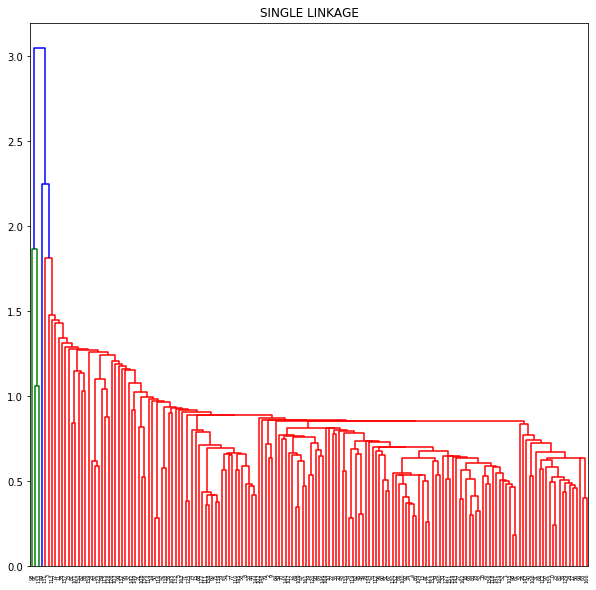

In [117]:
 
df_hie=pca_df    #copying the PCA data set
plt.figure(figsize=(10,10))
mergings = linkage(df_hie, method = "single", metric='euclidean') #single linkage
dendrogram(mergings) # dendrogram for single linkage.
plt.title('SINGLE LINKAGE')
plt.savefig('Single')
plt.show()


#### NOTE: Single Linkage does not show much clear view.So going forward with complete linkage.

#### COMPLETE LINKAGE

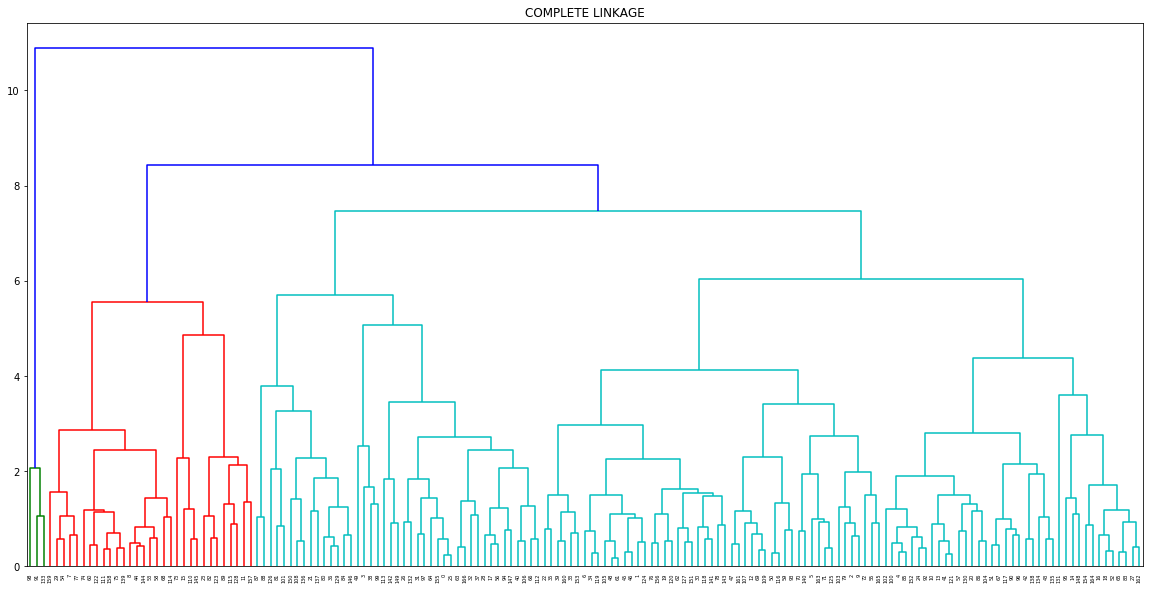

In [118]:
plt.figure(figsize=(20,10))
mergings = linkage(df_hie, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.title('COMPLETE LINKAGE')
plt.savefig('Complete')
plt.show()


#### Cutting the dendrogram at position 4 vertically to get 4 clusters.

In [119]:
#Cutting the clusters at position 4. 
clusters_cut=pd.Series(cut_tree(mergings,n_clusters=4).reshape(-1, )) 
cut_df=pd.concat([df_hie,clusters_cut],axis=1)      # concating the PCA data with clusters
cut_df.columns=["PC1","PC2","PC3","PC4","ClusterID"]     #renaming the columns
cut_df.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.092956,-0.219504,-1.006009,0.757343,0
1,0.446122,-0.378098,-0.013988,-1.369645,1
2,-0.468661,-0.341704,1.886559,-0.320336,1
3,-3.316476,1.467897,1.563956,1.787168,0
4,1.184911,0.329383,-0.150186,-0.865215,1


In [120]:
#Merging the Original Dataframe with the cluster columns:
cluster_df_hie=pd.merge(country,cut_df['ClusterID'],left_index=True,right_index=True)
cluster_df_hie.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [121]:
#counting each observations according to the clusters:
cluster_df_hie['ClusterID'].value_counts()

1    90
0    43
2    31
3     3
Name: ClusterID, dtype: int64

#### VISUALISING THE ACTUAL VARIABLES ACROSS THE CLUSTERS:

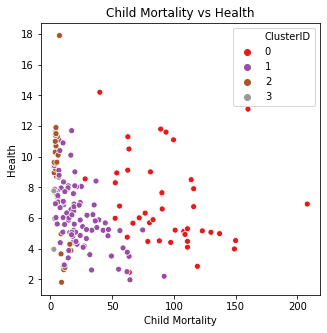

In [122]:
#Plotting actual variables with Cluster id:
plt.figure(figsize=(5,5))
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',palette='Set1',data=cluster_df_hie)
plt.title('Child Mortality vs Health')
plt.xlabel('Child Mortality')
plt.ylabel('Health')
plt.savefig('Child_health_HIE')
plt.show()

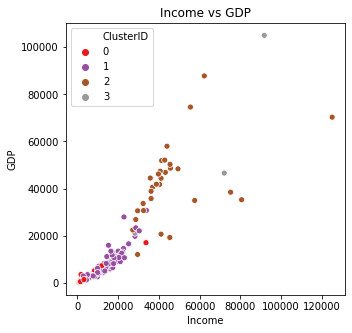

In [123]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',palette='Set1',data=cluster_df_hie)
plt.title('Income vs GDP')
plt.xlabel('Income')
plt.ylabel('GDP')
plt.savefig('Income_gdp_hie')
plt.show()

In [124]:
#Grouping the data based on average value:
child_mort_mean=pd.DataFrame(cluster_df_hie.groupby(['ClusterID']).child_mort.mean())
exports_mean=pd.DataFrame(cluster_df_hie.groupby(['ClusterID']).exports.mean())
health_mean=pd.DataFrame(cluster_df_hie.groupby(['ClusterID']).health.mean())
imports_mean=pd.DataFrame(cluster_df_hie.groupby(['ClusterID']).imports.mean())
income_mean=pd.DataFrame(cluster_df_hie.groupby(['ClusterID']).income.mean())
inflation_mean=pd.DataFrame(cluster_df_hie.groupby(['ClusterID']).inflation.mean())
life_expec_mean=pd.DataFrame(cluster_df_hie.groupby(['ClusterID']).life_expec.mean())
total_fer_mean=pd.DataFrame(cluster_df_hie.groupby(['ClusterID']).total_fer.mean())
gdpp_mean=pd.DataFrame(cluster_df_hie.groupby(['ClusterID']).gdpp.mean())


In [125]:
#creating the dataframe fro average data:
average_df_hie=pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean, imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean],axis=1)

In [126]:
#renaming the columns:
average_df_hie.columns=['clusters','child_mort_mean','export_mean','health_mean','import_mean','income_mean','inflation_mean','life_expec_mean','total_fer_mean','gdpp_mean']
average_df_hie.head()

,clusters,child_mort_mean,export_mean,health_mean,import_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,94.153488,29.253953,6.931395,46.302326,3483.558140,11.240581,58.858140,5.022093,1800.813953
1,1,23.775556,40.199767,6.123667,46.410732,12170.777778,7.514378,72.583333,2.357222,6886.433333
2,2,6.138710,47.138710,8.666452,38.474194,45996.774194,4.274935,79.841935,1.937742,41777.419355
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


#### Plotting the Average data across the clusters

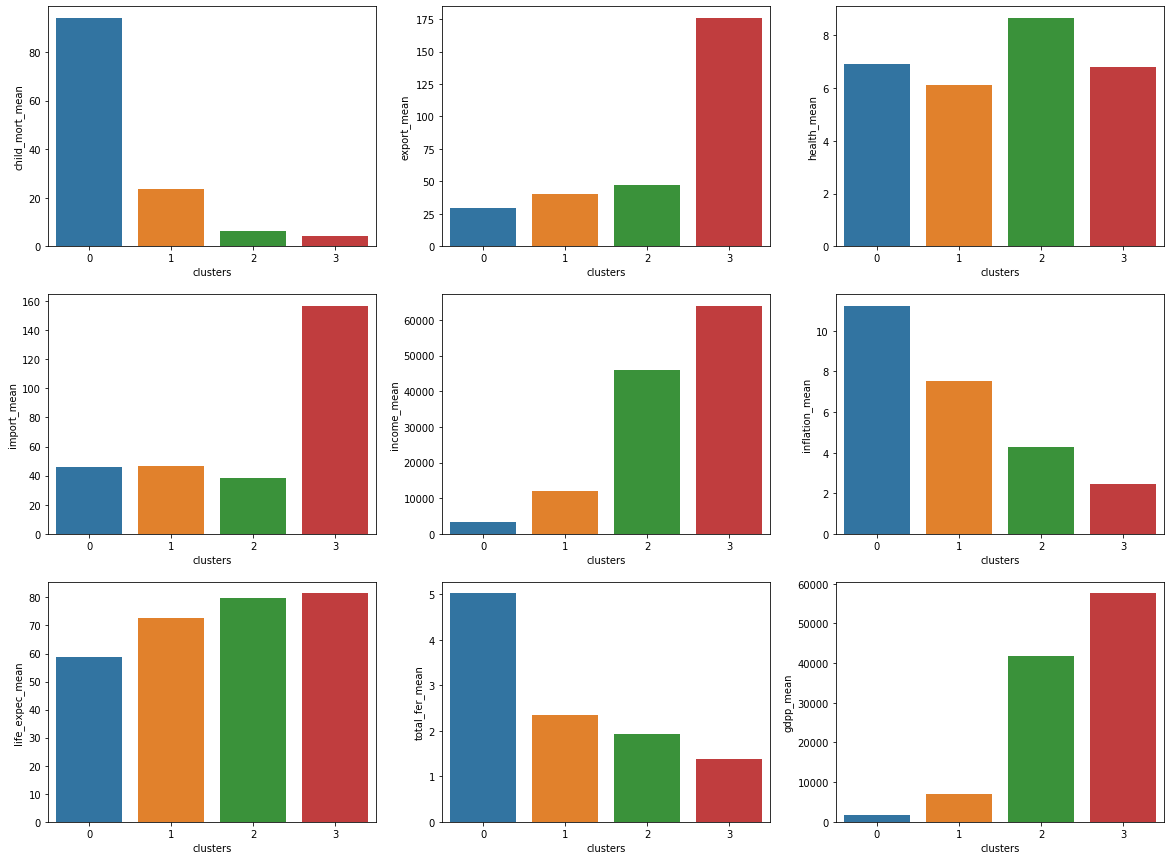

In [127]:

plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.barplot(average_df_hie.clusters,average_df_hie.child_mort_mean)

plt.subplot(3,3,2)
sns.barplot(average_df_hie.clusters,average_df_hie.export_mean)

plt.subplot(3,3,3)
sns.barplot(average_df_hie.clusters,average_df_hie.health_mean)

plt.subplot(3,3,4)
sns.barplot(average_df_hie.clusters,average_df_hie.import_mean)

plt.subplot(3,3,5)
sns.barplot(average_df_hie.clusters,average_df_hie.income_mean)

plt.subplot(3,3,6)
sns.barplot(average_df_hie.clusters,average_df_hie.inflation_mean)

plt.subplot(3,3,7)
sns.barplot(average_df_hie.clusters,average_df_hie.life_expec_mean)

plt.subplot(3,3,8)
sns.barplot(average_df_hie.clusters,average_df_hie.total_fer_mean)

plt.subplot(3,3,9)
sns.barplot(average_df_hie.clusters,average_df_hie.gdpp_mean)

plt.savefig('Average_hie.png')
plt.show()

#### ANALYSIS: We can see that Cluster 0 is the cluster with concern.
    - It has high Child Mortality Rate
    - Low Income.
    - Low GDP.
    - High Inflation
    - High Total Fertility Rate

In [128]:
#sorting the cluster accordign to High Child Mortality,  Low income, low Gdp:
cls_0_hie = cluster_df_hie[cluster_df_hie["ClusterID"]==0]
final_list_hie=cls_0_hie.sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head()

In [129]:
final_list_hie

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0


In [130]:
#list of countries that are in concern 
final_list_hie['country'].values

array(['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone'],
      dtype=object)

### Following countries are in direst aid(Using Hierarchical Clustering)
    - BURUNDI
    - LIBERIA
    - CONGO,DEM. REP.
    - NIGER
    - SIERRA LEONE

### FINAL ANALYSIS:
    1. Using both the clustering techniques K-Means and Hierarchical, we get the same countries. Hence these countries are performing poor and need direst aid from the Government.The Following Countries have low gdp and income. 
    2. Also the Inflation and Child Mortality rate is high here.
    3. The Total fertility Rate and Life Expectany is high in these countries.